 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Reading algorithmic returns
algo_data = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Reading S&P 500 Closing Prices
sp_data = Path( './Resources/sp500_history.csv')
sp_df = pd.read_csv(sp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\mpete\AppData\Local\Temp\ipykernel_24120\2049406800.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\mpete\AppData\Local\Temp\ipykernel_24120\2049406800.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\mpete\AppData\Local\Temp\ipykernel_24120\2049406800.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and

In [3]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5]:
sp_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [6]:
# Count nulls in Whale Dataframe
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Count nulls in SP 500 Dataframe
sp_df.isnull().sum()

Close    0
dtype: int64

In [8]:
# Drop nulls
whale_df.dropna(inplace=True)

In [9]:
# checking results of dropping the null values in the whale_returns dataframe
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Count nulls in Algo Dataframe
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df.dropna(inplace=True)

In [12]:
#checking results of dropping the null values in algo_returns data
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$','')
sp_df['Close'] = sp_df['Close'].astype('float')
sp_df.sort_index(ascending=True, inplace=True)

In [15]:
# Calculate Daily Returns
sp_df = sp_df.pct_change().dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_df.columns = ["S&P 500"]
sp_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_df, algo_df, sp_df], axis = 'columns', join = 'inner')
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

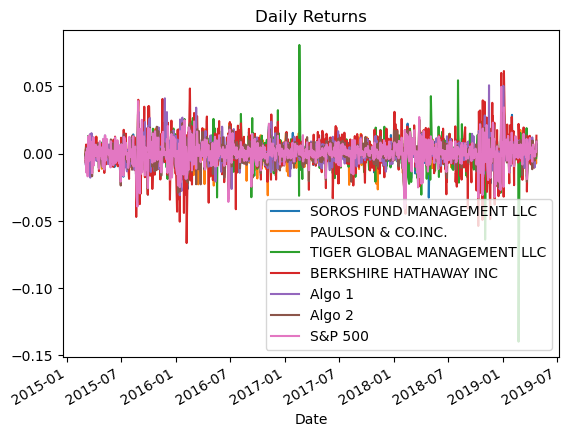

In [18]:
# Plot daily returns of all portfolios
daily_returns.plot(title = "Daily Returns")

#### Calculate and Plot cumulative returns.

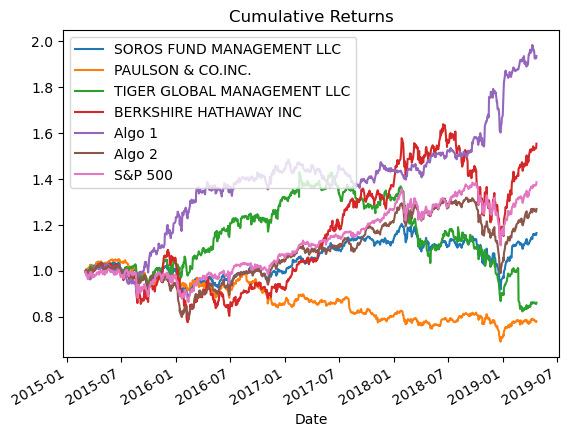

In [19]:
# Calculate cumulative returns of all portfolios
cum_ret = (1+ daily_returns).cumprod()
# Plot cumulative returns
cum_ret.plot(title = 'Cumulative Returns');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [20]:
# Box plot to visually show risk
soros_cov = daily_returns['SOROS FUND MANAGEMENT LLC'].cov(daily_returns['S&P 500'])
paulson_cov = daily_returns['PAULSON & CO.INC. '].cov(daily_returns['S&P 500'])
tiger_cov = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(daily_returns['S&P 500'])
berk_cov = daily_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns['S&P 500'])
algo1_cov = daily_returns['Algo 1'].cov(daily_returns['S&P 500'])
algo2_cov = daily_returns['Algo 2'].cov(daily_returns['S&P 500'])

In [21]:
variance = daily_returns['S&P 500'].var()
variance

7.316632424648712e-05

In [22]:
soros_beta = soros_cov/variance
paulson_beta = paulson_cov/variance
tiger_beta = tiger_cov/variance
berk_beta = berk_cov/variance
algo1_beta = algo1_cov/variance
algo2_beta = algo2_cov/variance
print(f'Soros: {soros_beta} | Paulson: {paulson_beta} | Tiger: {tiger_beta} | Berkshire: {berk_beta} | Algorithim 1: {algo1_beta} | Algorithim 2: {algo2_beta}')

Soros: 0.7733753547794622 | Paulson: 0.5498861853574506 | Tiger: 0.7946528805681025 | Berkshire: 1.1347891297491697 | Algorithim 1: 0.24899091459425637 | Algorithim 2: 0.8375345402757753


### Calculate Standard Deviations


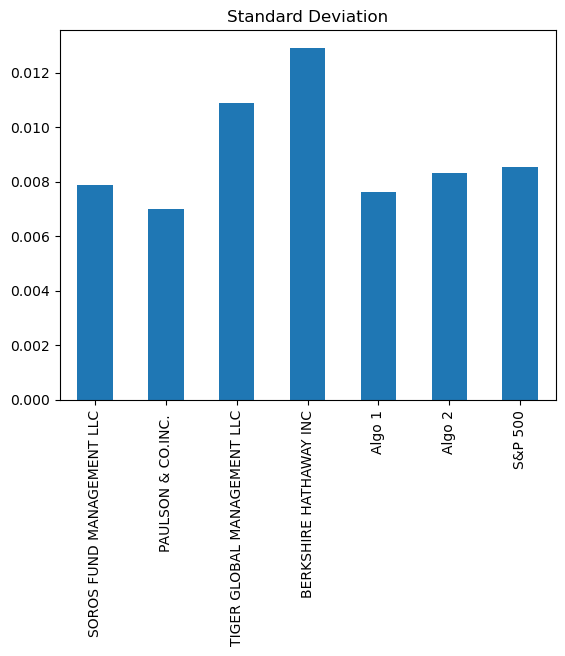

In [23]:
# Calculate the daily standard deviations of all portfolios
com_daily_std = daily_returns.std()
com_daily_std.plot(kind='bar', title="Standard Deviation");

### Determine which portfolios are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
com_anu_std = daily_returns.std()*np.sqrt(252)
com_anu_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

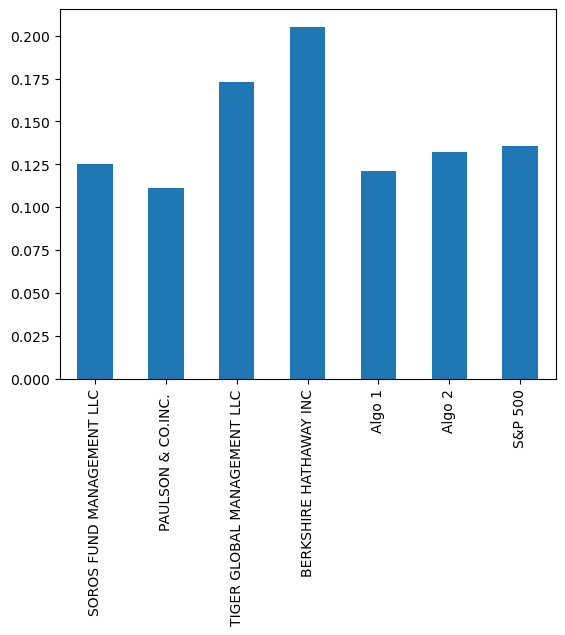

In [25]:
com_anu_std.plot(kind = 'bar');

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rlng_21 = daily_returns.rolling(window=21).std()

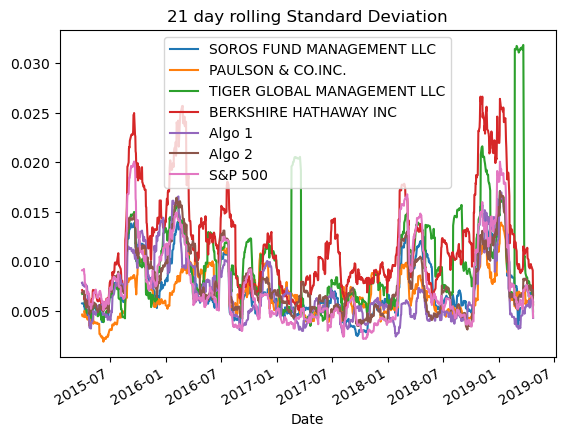

In [27]:
# Plot the rolling standard deviation
rlng_21.plot(title = '21 day rolling Standard Deviation');

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = daily_returns.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


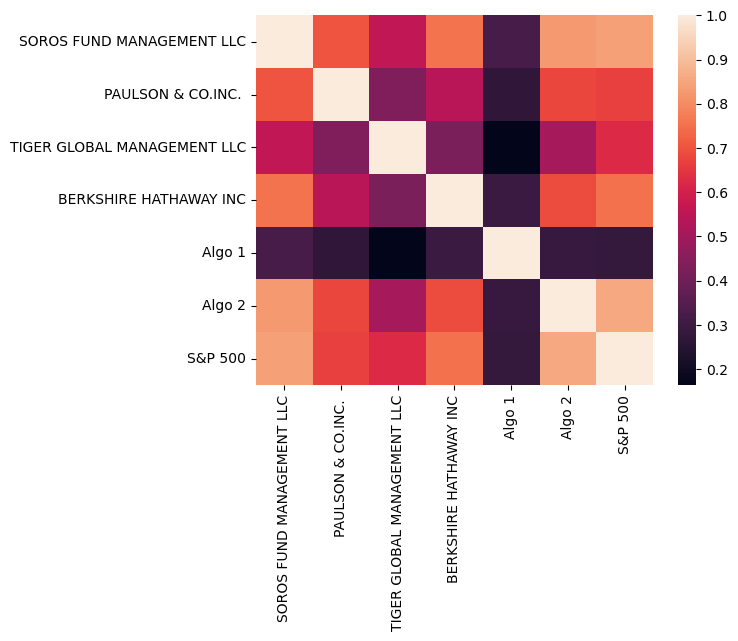

In [29]:
# Display de correlation matrix
sns.heatmap(correlation);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

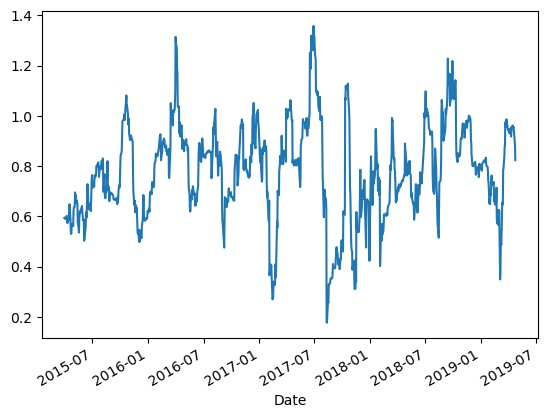

In [30]:
# Calculate covariance of a single portfolio
soros_rolling_cov = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(daily_returns['S&P 500'])
# Calculate variance of S&P 500
rolling_variance = daily_returns['S&P 500'].rolling(window=21).var()
# Computing beta
soros_beta = soros_rolling_cov/rolling_variance
# Plot beta trend
soros_beta.plot();

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [31]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
com_shrp = (daily_returns.mean() * 252) / (daily_returns.std()*np.sqrt(252))
com_shrp

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

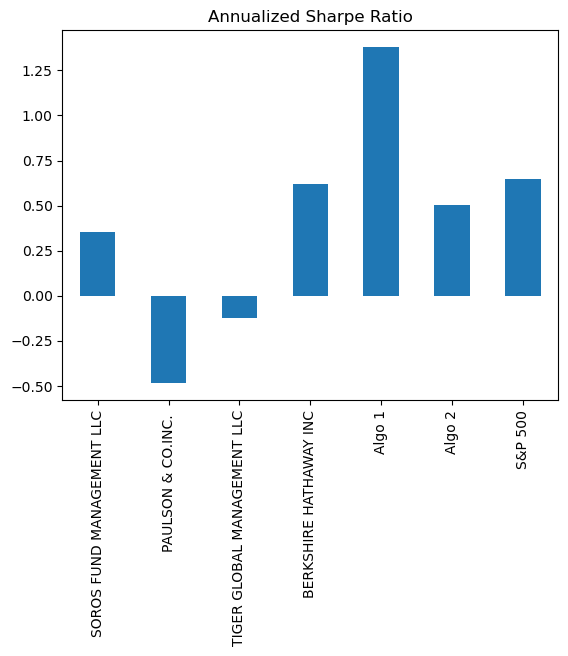

In [33]:
# Visualize the sharpe ratios as a bar plot
com_shrp.plot(kind = 'bar', title='Annualized Sharpe Ratio');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!\
The Algorithim 1 outperforms all whale portfolios and the S&P 500.
the Algorithim 2 only outperforms the Tiger, Paulson, and Soros portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading data from 1st stock
nucor_df = pd.read_csv(Path('./Nucor.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
nucor_df

C:\Users\mpete\AppData\Local\Temp\ipykernel_24120\3330066146.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nucor_df = pd.read_csv(Path('./Nucor.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-02,47.13
2015-03-03,47.15
2015-03-04,47.41
2015-03-05,47.64
2015-03-06,47.03
...,...
2019-12-23,56.77
2019-12-24,56.66
2019-12-26,56.80


In [35]:
# Reading data from 2nd stock
paypal_df = pd.read_csv(Path('./Paypal.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
paypal_df

C:\Users\mpete\AppData\Local\Temp\ipykernel_24120\2933924058.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  paypal_df = pd.read_csv(Path('./Paypal.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-07-06,36.71
2015-07-07,36.62
2015-07-08,34.70
2015-07-09,34.50
2015-07-10,34.69
...,...
2019-12-23,108.61
2019-12-24,108.69
2019-12-26,109.75


In [36]:
# Reading data from 3rd stock
stel_df = pd.read_csv(Path('./Stellantis.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
stel_df

C:\Users\mpete\AppData\Local\Temp\ipykernel_24120\971083779.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stel_df = pd.read_csv(Path('./Stellantis.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)


,Close
Date,
2015-03-02,6.91
2015-03-03,6.68
2015-03-04,6.77
2015-03-05,6.80
2015-03-06,6.64
...,...
2019-12-23,14.98
2019-12-24,14.79
2019-12-26,14.84


In [37]:
# Combine all stocks in a single DataFrame
custom_port = pd.concat([nucor_df, paypal_df, stel_df], axis='columns', join='inner')
custom_port.head()

,Close,Close,Close
Date,,,
2015-07-06,43.64,36.71,6.13
2015-07-07,44.11,36.62,6.16
2015-07-08,42.80,34.70,5.94
2015-07-09,42.96,34.50,6.08
2015-07-10,43.35,34.69,6.32


In [38]:
# Reorganize portfolio data by having a column per symbol
custom_port.columns = ['NUE', 'PYPL', 'STLA']
custom_port.head()

,NUE,PYPL,STLA
Date,,,
2015-07-06,43.64,36.71,6.13
2015-07-07,44.11,36.62,6.16
2015-07-08,42.80,34.70,5.94
2015-07-09,42.96,34.50,6.08
2015-07-10,43.35,34.69,6.32


In [39]:
# Reset Date index
custom_port.sort_index(ascending=True)
custom_port = custom_port.reset_index(drop=False)
custom_port.head()

,Date,NUE,PYPL,STLA
0,2015-07-06,43.64,36.71,6.13
1,2015-07-07,44.11,36.62,6.16
2,2015-07-08,42.80,34.70,5.94
3,2015-07-09,42.96,34.50,6.08
4,2015-07-10,43.35,34.69,6.32


In [40]:
# Set Index as 'Date'
custom_port.set_index('Date', inplace=True)

In [41]:
# Calculate daily returns
custom_daily = custom_port.pct_change()
custom_daily.head()

,NUE,PYPL,STLA
Date,,,
2015-07-06,NaN,NaN,NaN
2015-07-07,0.010770,-0.002452,0.004894
2015-07-08,-0.029698,-0.052430,-0.035714
2015-07-09,0.003738,-0.005764,0.023569
2015-07-10,0.009078,0.005507,0.039474


In [42]:
# Drop NAs
custom_daily.dropna(inplace=True)
# Display sample data
custom_daily.sample(5)                    

,NUE,PYPL,STLA
Date,,,
2019-08-28,0.014804,0.000186,0.012490
2015-12-30,-0.003458,-0.016181,-0.014354
2015-10-30,-0.000236,0.002785,0.006299
2016-08-08,-0.000747,-0.004987,0.002976
2017-03-14,0.000329,-0.011505,-0.004521


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_returns = pd.DataFrame(custom_daily.dot(weights))
custom_returns.columns = ['Peters Investments']
# Display sample data
custom_returns

,Peters Investments
Date,
2015-07-07,0.004404
2015-07-08,-0.039281
2015-07-09,0.007181
2015-07-10,0.018020
2015-07-13,0.028871
...,...
2019-12-23,-0.000687
2019-12-24,-0.004628
2019-12-26,0.005201


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([daily_returns, custom_returns], axis='columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Peters Investments
Date,,,,,,,,
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,0.004404
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.039281
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.007181
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,0.012338,0.018020
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,0.011066,0.028871


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Peters Investments             0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
all_return_std = all_returns.std() * np.sqrt(252)
all_return_std.head(8)

SOROS FUND MANAGEMENT LLC      0.128451
PAULSON & CO.INC.              0.115060
TIGER GLOBAL MANAGEMENT LLC    0.178657
BERKSHIRE HATHAWAY INC         0.211795
Algo 1                         0.123379
Algo 2                         0.135252
S&P 500                        0.137790
Peters Investments             0.254654
dtype: float64

### Calculate and plot rolling `std` with 21-day window

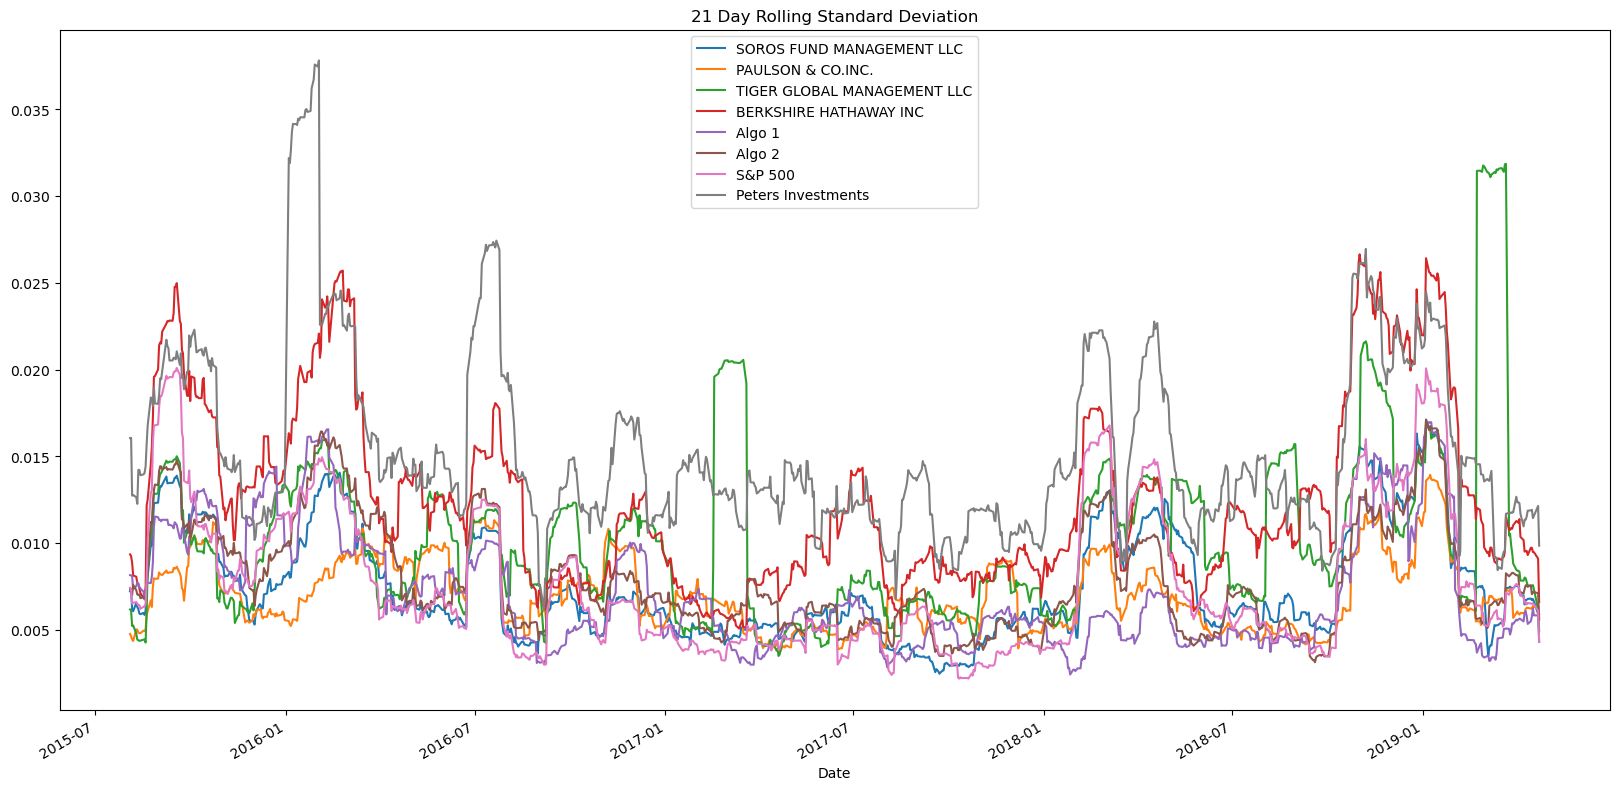

In [47]:
# Calculate rolling standard deviation
all_rolling_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_rolling_std.plot(title='21 Day Rolling Standard Deviation', figsize=(20,10));

### Calculate and plot the correlation

In [48]:
# Calculate the correlation
all_corr = all_returns.corr()
all_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Peters Investments
SOROS FUND MANAGEMENT LLC,1.000000,0.699874,0.554362,0.753733,0.326845,0.827389,0.839239,0.651903
PAULSON & CO.INC.,0.699874,1.000000,0.428079,0.543406,0.277709,0.679331,0.672557,0.501520
TIGER GLOBAL MANAGEMENT LLC,0.554362,0.428079,1.000000,0.416998,0.166438,0.497358,0.615782,0.412479
BERKSHIRE HATHAWAY INC,0.753733,0.543406,0.416998,1.000000,0.297634,0.686031,0.754917,0.591850
Algo 1,0.326845,0.277709,0.166438,0.297634,1.000000,0.299336,0.286461,0.237717
Algo 2,0.827389,0.679331,0.497358,0.686031,0.299336,1.000000,0.858622,0.672932
S&P 500,0.839239,0.672557,0.615782,0.754917,0.286461,0.858622,1.000000,0.709979
Peters Investments,0.651903,0.501520,0.412479,0.591850,0.237717,0.672932,0.709979,1.000000


<Axes: >

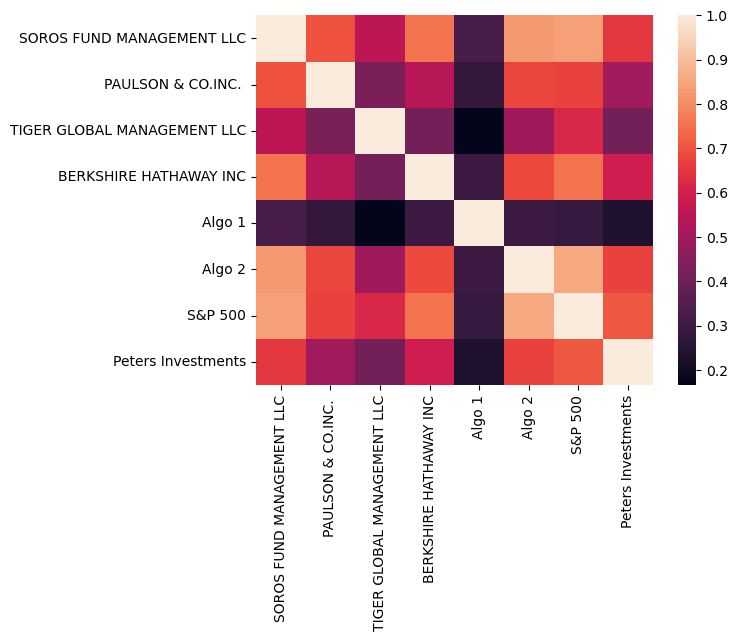

In [49]:
# Calculate and plot the correlation
all_corr = all_returns.corr()
sns.heatmap(all_corr)

In [50]:
# Calculate cumulative returns of all portfolios
all_cum_returns = (1+ all_returns).cumprod()
all_cum_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Peters Investments
Date,,,,,,,,
2015-07-07,1.000597,1.003962,1.004652,0.992366,0.995389,0.997481,1.006081,1.004404
2015-07-08,0.983376,0.996277,0.989796,0.980719,0.981600,0.981992,0.989327,0.964950
2015-07-09,0.990723,1.000149,0.990232,0.998048,0.995431,0.985550,0.991565,0.971880
2015-07-10,0.999609,1.003738,1.003704,1.005050,0.998777,0.999724,1.003799,0.989393
2015-07-13,1.007552,1.004892,1.012394,1.015279,1.002988,1.008297,1.014907,1.017958
...,...,...,...,...,...,...,...,...
2019-04-16,1.159616,0.759096,0.863974,1.561021,1.970356,1.277892,1.405219,2.457427
2019-04-17,1.156257,0.754187,0.860164,1.566051,1.950059,1.271211,1.402023,2.469414
2019-04-18,1.157931,0.755108,0.860664,1.569051,1.948913,1.269648,1.404237,2.442944


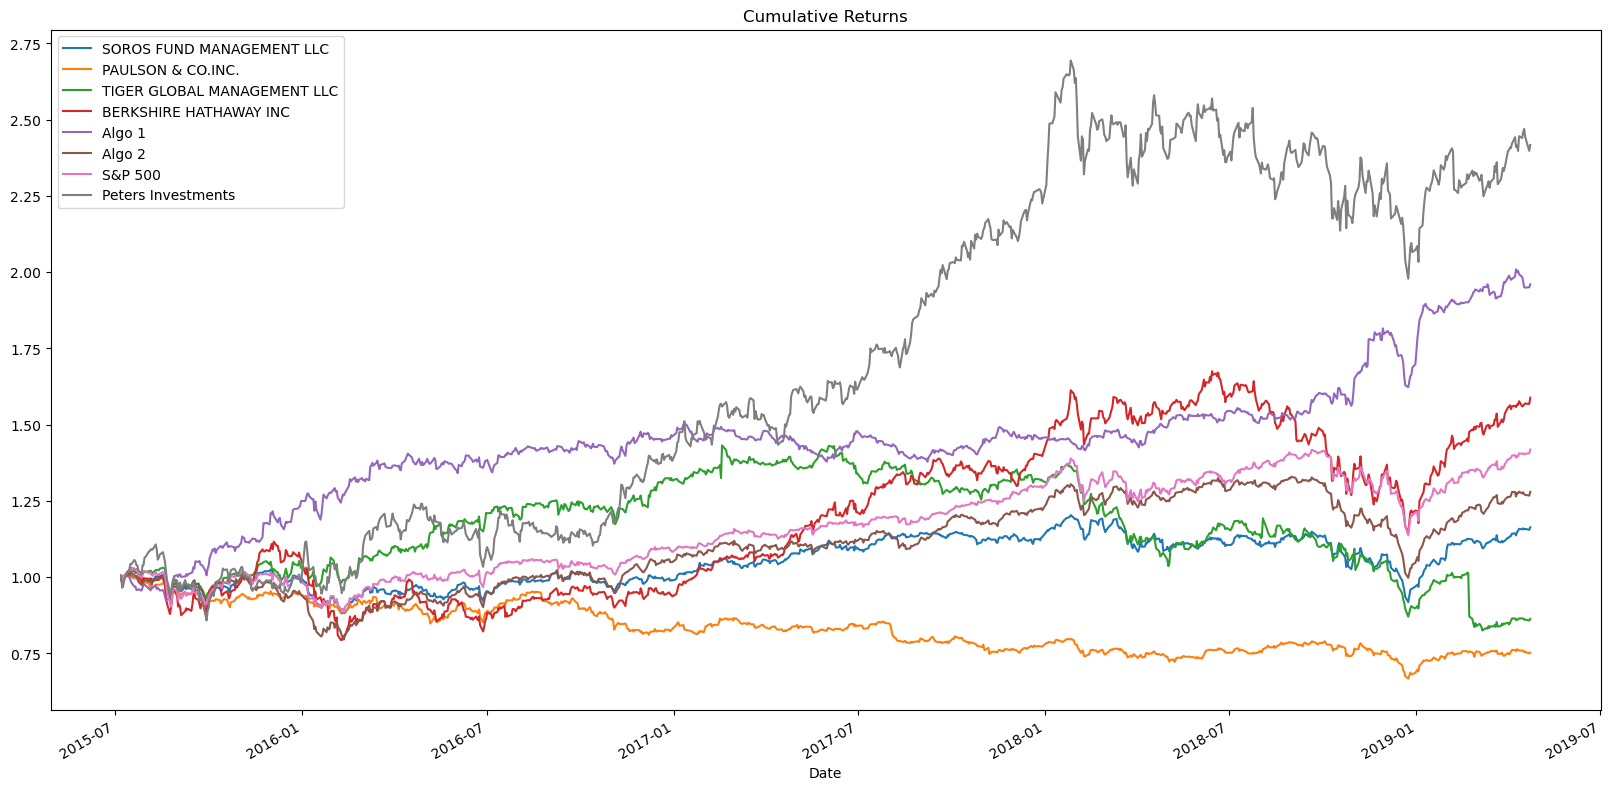

In [51]:
# Plot cumulative returns
all_cum_returns.plot(title = 'Cumulative Returns', figsize=[20,10]);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

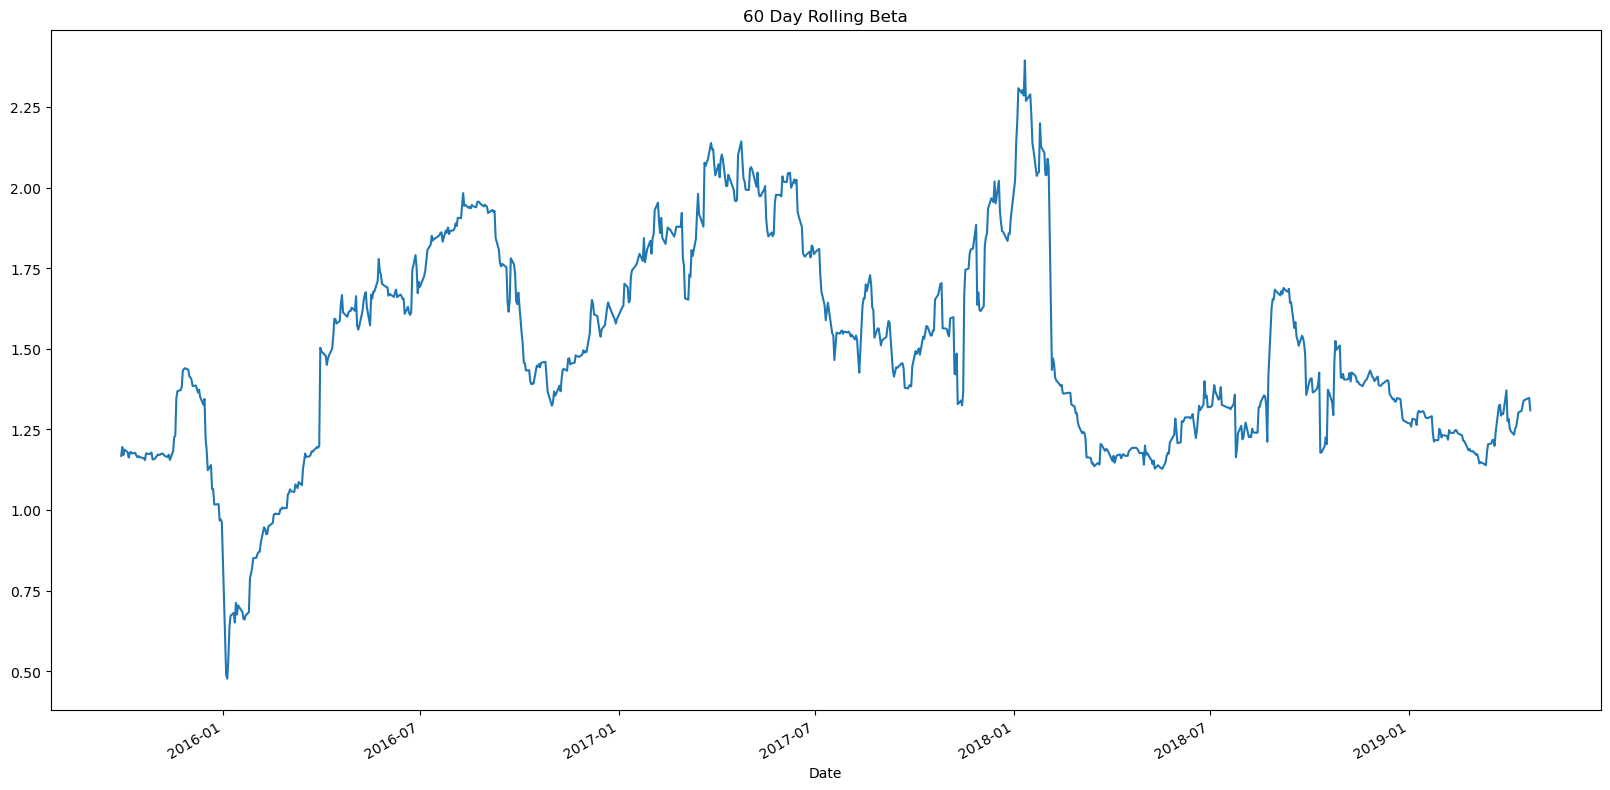

In [52]:
# Calculate and plot Beta
Peters_rolling_cov = all_returns['Peters Investments'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_60_var = all_returns['S&P 500'].rolling(window=60).var()
Peters_rolling_beta = Peters_rolling_cov/rolling_60_var
Peters_rolling_beta.plot(title='60 Day Rolling Beta', figsize=[20,10]);

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualized Sharpe Ratios
all_shrp = (all_returns.mean() * 252) / (all_returns.std()*np.sqrt(252))
all_shrp

SOROS FUND MANAGEMENT LLC      0.374540
PAULSON & CO.INC.             -0.594726
TIGER GLOBAL MANAGEMENT LLC   -0.126606
BERKSHIRE HATHAWAY INC         0.682010
Algo 1                         1.499441
Algo 2                         0.547964
S&P 500                        0.737344
Peters Investments             1.040406
dtype: float64

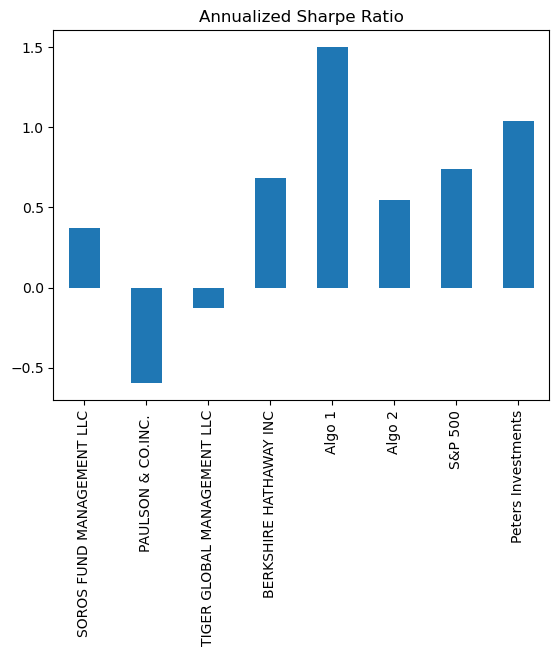

In [54]:
# Visualize the sharpe ratios as a bar plot
all_shrp.plot(kind='bar', title='Annualized Sharpe Ratio');

### How does your portfolio do?

I believe my portfolio has done well compared to the other portfolios.
the cumulative returns were greater than all the other portfolios and only fell behind the algoritim 1 in the annualized sharpe ratio.
